**Target**:
> Model needs to be slightly changed for the following reasons: 
1.   Reduce the number of parameters to less than 10000. Compensate this by adding a convolution layer with padding and tune the learning rate and reduce batch size
2. Hit an accuracy of 99.4% consistently.  



**Results**:

> 1.   Parameters: 8790
2.   Best Training Accuracy: 98.038%
3.   Best Test Accuracy: 99.48%





**Analysis**:

> 1.   Model is underfitting.
2.   Learning rate can further be tuned to increase accuracy.















In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_set = torchvision.datasets.MNIST(root='/Data',
                                       train = True,
                                       download = True,
                                       transform=transforms.Compose([
                                                                     transforms.ToTensor(),
                                                                     
                                       ]),
                                       )
test_set = torchvision.datasets.MNIST(root='/Data',
                                       train = False,
                                       download = True,
                                       transform=transforms.Compose([
                                                                     transforms.ToTensor(),
                                                                     
                                       ]),
                                       )

In [ ]:
print(f"""Shape: {train_set.data.shape}
Minimum: {torch.min(train_set.transform(train_set.data.numpy()))}
Maximum: {torch.max(train_set.transform(train_set.data.numpy()))}
Mean: {torch.mean(train_set.transform(train_set.data.numpy()))}
Standard Deviation: {torch.std(train_set.transform(train_set.data.numpy()))}
Variance : {torch.var(train_set.transform(train_set.data.numpy()))}""")


Shape: torch.Size([60000, 28, 28])
Minimum: 0.0
Maximum: 1.0
Mean: 0.13066047430038452
Standard Deviation: 0.30810782313346863
Variance : 0.09493042528629303


In [ ]:
train_set.transform = transforms.Compose([
                                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.13066047430038452,),(0.30810782313346863,))
                                        ])
test_set.transform =  transforms.Compose([
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.13066047430038452,),(0.30810782313346863,))
                                        ])


In [ ]:
train_set.transform , test_set.transform

(Compose(
     RandomRotation(degrees=[-7.0, 7.0], resample=False, expand=False, fill=(1,))
     ToTensor()
     Normalize(mean=(0.13066047430038452,), std=(0.30810782313346863,))
 ), Compose(
     ToTensor()
     Normalize(mean=(0.13066047430038452,), std=(0.30810782313346863,))
 ))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                           batch_size = 64,
                                           shuffle = True,
                                           pin_memory = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = 64,
                                          shuffle = True,
                                          pin_memory = True)

In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


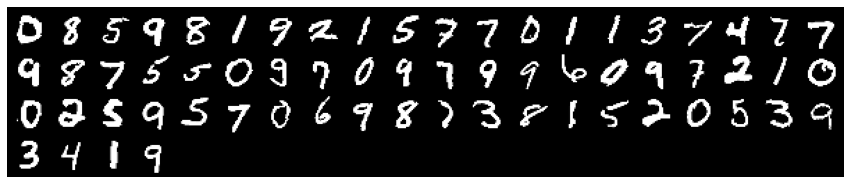

In [ ]:
plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0)), cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
class CustomModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv_Block1 = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3, padding=1 ,bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)

    ) # Output size = 28

    self.conv_Block2 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)

    ) # Output size = 26
    self.conv_Block3 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)
    ) # Output size = 24

    self.conv_Block4 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)
    ) # Output size = 22

    self.conv_Block5 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(20),
        nn.Dropout(0.1)
    ) # Output size = 20
    
    self.transition_block1 = nn.Sequential(
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Conv2d(in_channels = 20, out_channels = 10, kernel_size = 1, bias = False)
    ) # Output size = 10   

    
         
    self.conv_Block6 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)
    ) # Output size = 8

    self.conv_Block7 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Dropout(0.1)
    ) # Output size = 6   

    self.conv_Block8 = nn.Sequential(
        nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3, bias = False),
        nn.ReLU(),
        nn.BatchNorm2d(20),
        nn.Dropout(0.1)
    ) # Output size = 4
    
    self.gap = nn.AvgPool2d(kernel_size = 4) # Output size = 1

    self.merge_block1 = nn.Sequential(
        #nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Conv2d(in_channels = 20, out_channels = 10, kernel_size = 1, bias = False)
    ) # Output size = 1

    

  def forward(self, image):
    image = self.conv_Block5(self.conv_Block4(self.conv_Block3(self.conv_Block2(self.conv_Block1(image)))))   
    image = self.transition_block1(image)
    image = self.conv_Block8(self.conv_Block7(self.conv_Block6(image)))
    image = self.gap(image)
    image = self.merge_block1(image)
    
    image = image.reshape(-1,10)
    return F.log_softmax(image, dim=-1)




In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available() # check if GPU available
device = torch.device("cuda" if use_cuda else "cpu") # use cpu if gpu is not available
model = CustomModel().to(device) 
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 26, 26]             900
              ReLU-6           [-1, 10, 26, 26]               0
       BatchNorm2d-7           [-1, 10, 26, 26]              20
           Dropout-8           [-1, 10, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             900
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
          Dropout-12           [-1, 10, 24, 24]               0
           Conv2d-13           [-1, 10, 22, 22]             900
             ReLU-14           [-1, 10,

In [ ]:
print(next(iter(model.parameters())),next(iter(model.parameters())).shape)

Parameter containing:
tensor([[[[ 0.0330,  0.1684,  0.1879],
          [-0.2518,  0.2316,  0.2784],
          [ 0.1949, -0.1975,  0.1642]]],


        [[[ 0.2180,  0.1064,  0.2730],
          [-0.0391,  0.0436, -0.1743],
          [-0.0215, -0.1004, -0.2816]]],


        [[[ 0.3053, -0.0558,  0.2159],
          [-0.1947, -0.2281,  0.2335],
          [-0.3070,  0.1691, -0.1032]]],


        [[[-0.2989, -0.3162,  0.0781],
          [ 0.2492,  0.2714, -0.1927],
          [-0.1481,  0.1382, -0.1644]]],


        [[[-0.2989, -0.3202,  0.2661],
          [-0.2429,  0.2936,  0.1076],
          [ 0.2075,  0.2961, -0.1514]]],


        [[[-0.2742,  0.1963,  0.0051],
          [-0.2041,  0.1276, -0.2697],
          [-0.0842, -0.3310,  0.1637]]],


        [[[-0.1840, -0.1688,  0.2642],
          [ 0.2810, -0.1621, -0.1777],
          [-0.2520,  0.2815,  0.1252]]],


        [[[-0.3187, -0.2731,  0.2978],
          [-0.2214,  0.2881, -0.3314],
          [ 0.1615,  0.0815,  0.0178]]],


        [[

# Training the entire set

In [ ]:
def train_model(model, device, train_loader, optimiser):
  train_loss, train_accuracy, total_train_correct, total_train_processed = 0, 0, 0, 0    
  model.train()
  for batch in train_loader: 
    images, labels = batch
    images, labels = images.to(device), labels.to(device) 
    optimiser.zero_grad()

    pred = model(images)
    pred_values = pred.argmax(dim=1, keepdim=True)
    loss = F.nll_loss(pred, labels)
    train_loss += loss.item()

    loss.backward()
    optimiser.step()       
    
    total_train_correct += pred_values.eq(labels.view_as(pred_values)).sum().item()
    total_train_processed += len(images)
    
  train_accuracy = 100*(total_train_correct/total_train_processed)
  train_loss /= len(train_loader.dataset) 
  return train_loss, train_accuracy  



def test_model(model, device, test_loader):
  test_loss, test_accuracy, total_test_correct, total_test_processed = 0, 0, 0, 0    
  model.eval()
  for batch in test_loader: 
    images, labels = batch
    images, labels = images.to(device), labels.to(device) 
    
    pred = model(images)
    pred_values = pred.argmax(dim=1, keepdim=True)
    loss = F.nll_loss(pred, labels)
    test_loss += loss.item()          
    
    total_test_correct += pred_values.eq(labels.view_as(pred_values)).sum().item()
    total_test_processed += len(images)
    
  test_accuracy = 100*(total_test_correct/total_test_processed)
  test_loss /= len(test_loader.dataset) 
  return test_loss, test_accuracy
  





In [ ]:
optimiser = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [ ]:
def train_epochs(epochs, model, device, train_loader, optimiser, test_loader):
  train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
  for epoch in range(epochs):
    print(f"Epoch {epoch+1} in progress....")
    train_loss, train_accuracy = train_model(model, device, train_loader, optimiser)      
    test_loss, test_accuracy = test_model(model, device, test_loader)
    print(f"\nEpoch : {epoch+1} \n\nAverage Train Loss : {train_loss :.9f} \nTrain Accuracy : {train_accuracy : .4f}% \n\nAverage Test Loss : {test_loss :.9f} \nTest Accuracy : {test_accuracy : .4f}% \n\n")
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
  return train_losses, train_accuracies, test_losses, test_accuracies
  

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_epochs(15, model, device, train_loader, optimiser, test_loader)

Epoch 1 in progress....

Epoch : 1 

Average Train Loss : 0.000591537 
Train Accuracy :  98.8517% 

Average Test Loss : 0.000353561 
Test Accuracy :  99.3200% 


Epoch 2 in progress....

Epoch : 2 

Average Train Loss : 0.000595773 
Train Accuracy :  98.8950% 

Average Test Loss : 0.000343577 
Test Accuracy :  99.3000% 


Epoch 3 in progress....

Epoch : 3 

Average Train Loss : 0.000582111 
Train Accuracy :  98.8133% 

Average Test Loss : 0.000314325 
Test Accuracy :  99.3400% 


Epoch 4 in progress....

Epoch : 4 

Average Train Loss : 0.000553657 
Train Accuracy :  98.9083% 

Average Test Loss : 0.000346189 
Test Accuracy :  99.2900% 


Epoch 5 in progress....

Epoch : 5 

Average Train Loss : 0.000551763 
Train Accuracy :  98.8717% 

Average Test Loss : 0.000357381 
Test Accuracy :  99.3000% 


Epoch 6 in progress....

Epoch : 6 

Average Train Loss : 0.000518481 
Train Accuracy :  98.9217% 

Average Test Loss : 0.000299456 
Test Accuracy :  99.3800% 


Epoch 7 in progress....

Epo

Text(0.5, 1.0, 'Test Accuracy')

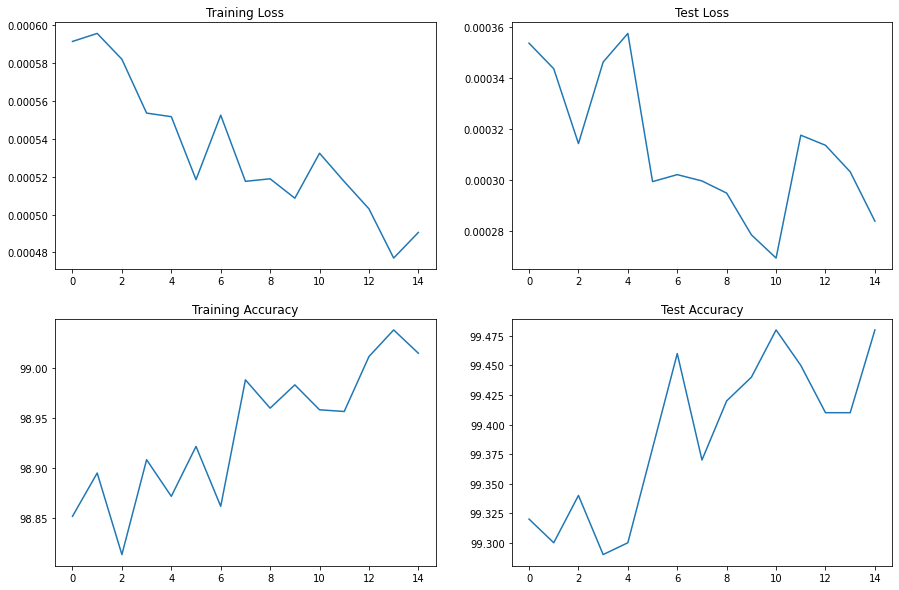

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_accuracies)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accuracies)
axs[1, 1].set_title("Test Accuracy")